In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os

import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
# from tensorflow.keras.utils import image_dataset_from_directory

C:\Users\HP\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


##### Load buffalo and elephant dataset

In [44]:
data_train = image_dataset_from_directory(
    directory=r"C:\Users\HP\Desktop\CNN",
    labels="inferred",
    image_size=[256, 256],
    class_names=["buffalo", "elephant"],
    label_mode = "categorical",
    interpolation="nearest",
    batch_size=32,
    shuffle=True
)

Found 752 files belonging to 2 classes.


In [3]:
# Data Pipeline
# def convert_to_float(image):
#     image = tf.image.convert_image_dtype(image, dtype=tf.float32)
#     return image

In [4]:
# AUTOTUNE = tf.data.experimental.AUTOTUNE
# data_train = (
#     data_train
#     .map(convert_to_float)
#     .cache()
#     .prefetch(buffer_size=AUTOTUNE)
# )
# data_train = data_train.map(convert_to_float)

In [45]:
data_iterator = data_train.as_numpy_iterator()

In [46]:
# Get another batch
batch = data_iterator.next()

In [47]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [48]:
# ClASS 1 - ELEPHANT
# CLASS 0 - BUFFALO
batch[1]

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0])

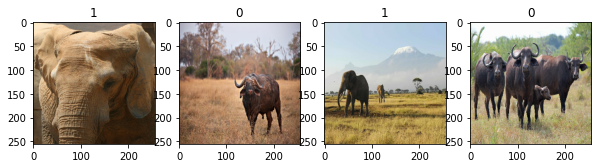

In [50]:
# Plotting the Images
count = 1
plt.figure(figsize=(20,20))
for i, j in enumerate(batch[0][:4]):
    plt.subplot(1,4, count)
    plt.imshow(j)
    plt.title(batch[1][i])
    count += 1

##### Preprocessing Data

###### Scale data

In [51]:
data_train = data_train.map(lambda x,y: (x/255, y))

In [52]:
scaled_iterator = data_train.as_numpy_iterator()

In [53]:
scaled_batch = scaled_iterator.next()

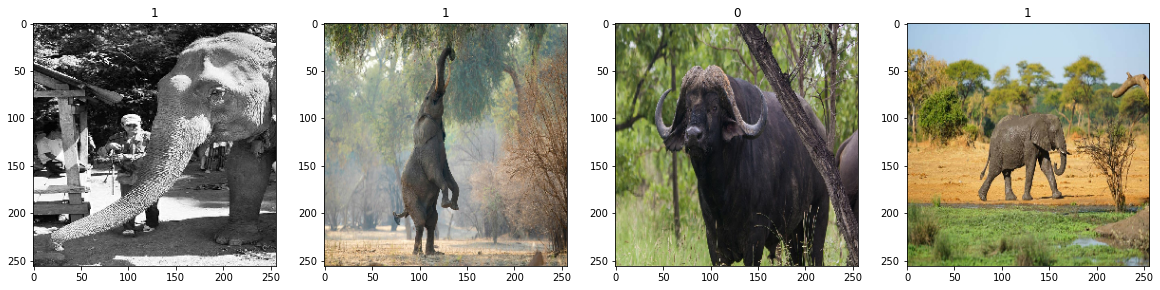

In [54]:
# Plotting Scaled Images using subplots and axes
fig, ax = plt.subplots(ncols=4, figsize = (20,20))
for idx, img in enumerate(scaled_batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(scaled_batch[1][idx])

###### Split data

In [55]:
len(data_train)

24

In [56]:
train_data = int(len(data_train) * 0.7)
val_data = int(len(data_train) * 0.2) + 1
test_data = int(len(data_train) * 0.1) + 1

In [57]:
train = data_train.take(train_data)
val = data_train.skip(train_data).take(val_data)
test = data_train.skip(train_data+val_data).take(test_data)

##### Building the deep learning model

In [58]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [59]:
model = Sequential([
    Conv2D(16, (3,3), 1, activation = "relu", input_shape = (256, 256, 3)),
    MaxPooling2D(),
    
    Conv2D(32, (3,3), 1, activation = "relu"),
    MaxPooling2D(),
    
    Conv2D(16, (3,3), 1, activation = "relu"),
    MaxPooling2D(),
    
    Flatten(),
    
    Dense(256, activation="relu"),
    Dense(1, activation="sigmoid"),
])

In [60]:
model.compile(
    optimizer="adam",
    loss= "binary_crossentropy",
    metrics = ["accuracy"]
)

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 30, 30, 16)       

In [62]:
# call_backs = keras.callbacks.TensorBoard(
#     log_dir = r"C:\Users\HP\Desktop\CNN\logs"
# )

In [63]:
history = model.fit(
    train,
    validation_data=val,
    epochs=20,
)

Epoch 1/20
16/16 [==============================] - 18s 962ms/step - loss: 0.7215 - accuracy: 0.5156 - val_loss: 0.6512 - val_accuracy: 0.5688
Epoch 2/20
16/16 [==============================] - 16s 904ms/step - loss: 0.5750 - accuracy: 0.7285 - val_loss: 0.5185 - val_accuracy: 0.7437
Epoch 3/20
16/16 [==============================] - 19s 1s/step - loss: 0.5065 - accuracy: 0.7578 - val_loss: 0.4660 - val_accuracy: 0.7875
Epoch 4/20
16/16 [==============================] - 18s 1s/step - loss: 0.4039 - accuracy: 0.7910 - val_loss: 0.6689 - val_accuracy: 0.6062
Epoch 5/20
16/16 [==============================] - 18s 994ms/step - loss: 0.4131 - accuracy: 0.8086 - val_loss: 0.3421 - val_accuracy: 0.8500
Epoch 6/20
16/16 [==============================] - 18s 1s/step - loss: 0.3062 - accuracy: 0.8750 - val_loss: 0.2899 - val_accuracy: 0.8813
Epoch 7/20
16/16 [==============================] - 18s 1s/step - loss: 0.2851 - accuracy: 0.8809 - val_loss: 0.2507 - val_accuracy: 0.9000
Epoch 8/20


##### Plot Performance

In [64]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.721524,0.515625,0.651204,0.56875
1,0.575011,0.728516,0.518495,0.74375
2,0.506523,0.757812,0.465957,0.78750
3,0.403892,0.791016,0.668919,0.60625
4,0.413062,0.808594,0.342136,0.85000


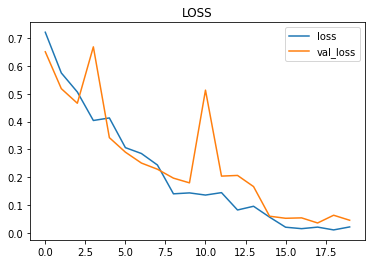

In [65]:
history_df.loc[:, ["loss", "val_loss"]].plot()
plt.title("LOSS")
plt.show()

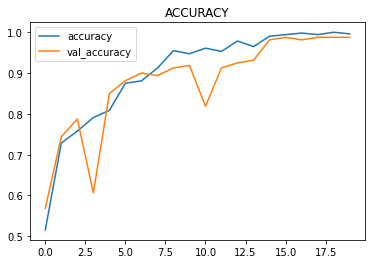

In [66]:
history_df.loc[:, ["accuracy", "val_accuracy"]].plot()
plt.title("ACCURACY")
plt.show()

##### Evaluate

In [67]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [68]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [69]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 245ms/step


In [70]:
print(f"Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}")

Precision: 0.9767441749572754, Recall: 1.0, Accuracy: 0.987500011920929


##### Testing the model

In [71]:
import cv2

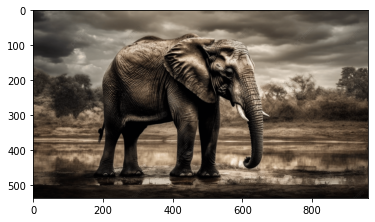

In [111]:
img = cv2.imread(r"C:\Users\HP\Downloads\elephanttest1.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

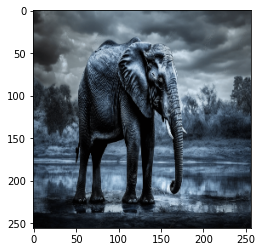

In [112]:
# Resizing the image
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [113]:
resize.shape

TensorShape([256, 256, 3])

In [114]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [115]:
y_pred = model.predict(np.expand_dims(resize/255, 0))
if y_pred > 0.5:
    print("The animal is an ELEPHANT")
else:
    print("The animal is a BUFFALO")

1/1 [==============================] - 0s 222ms/step
The animal is an ELEPHANT


##### Save Model

In [99]:
import pickle

In [100]:
with open ("elephantbuffalo.pkl", "wb") as filename:
    pickle.dump(model, filename)